In [38]:
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib import cm 
from matplotlib import colors as mclr

from scipy import integrate as intg

plt.rc('figure', dpi=300)
plt.rc('font', family = 'Times New Roman')
plt.rc('font', size = 14)
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=18)
plt.rc('lines', linewidth=0.3)
plt.rc('lines',marker='.')

one = np.eye(2,dtype=complex)
tau1 = np.array([ [0.j,1.],[1.,0.j]],dtype=complex)
tau2 = np.array([[0.,-1.j],[1.j,0.]],dtype=complex)
tau3 = -1.j*tau1@tau2

In [39]:
def H(p,mu,tperp,tpar,B):
    return -mu*one - tperp*tau1 - 2.*tpar*np.cos( p - 0.5*B*tau3 )

def nel(h,t):
    return np.linalg.inv(np.exp(h/t)+one)

def nho(h,t):
    return np.linalg.inv(np.exp(-h/t)+one)

def integrand(p,q,t,mu,tperp,tpar,B):
    h1 = H(p-q/2,mu,tperp,tpar,B)
    h2 = H(p+q/2,mu,tperp,tpar,B)
    
    n1 = nel(h1,t)
    n2 = nho(h2,t)
    
    return np.trace(n1@tau2@n2@tau2)

def PiHall(q,t,mu,tperp,tpar,B):
    
    
    return intg.quad(integrand,-np.pi,np.pi,args=(q,t,mu,tperp,tpar,B))[0]

In [75]:
tpar = 1.0
tperp = 0.2
temp = 0.005

nummus = 10
mus= np.linspace(-1.9,1.9,nummus)

numBs = 10
Bs = np.linspace(0.,3.,numBs)


numqs = 12
qs = np.linspace(0,np.pi,numqs)
Piqs = np.zeros((nummus,numBs,numqs),dtype=complex)

for i in range(nummus):
    mu = mus[i]
    
    for j in range(numBs):
        B = Bs[j]
        
        for k in range(numqs):
            Piqs[i,j,k] = PiHall(qs[k],temp,mus[i],tperp,tpar,Bs[j])

/usr/lib/python3/dist-packages/scipy/integrate/_quadpack_py.py:463: ComplexWarning: Casting complex values to real discards the imaginary part
  return _quadpack._qagse(func,a,b,args,full_output,epsabs,epsrel,limit)
/tmp/ipykernel_13225/331834986.py:5: RuntimeWarning: overflow encountered in exp
  return np.linalg.inv(np.exp(h/t)+one)
/tmp/ipykernel_13225/331834986.py:22: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  return intg.quad(integrand,-np.pi,np.pi,args=(q,t,mu,tperp,tpar,B))[0]
/tmp/ipykernel_13225/331834986.py:22: IntegrationWarning: The algorithm does not converge.  Rou

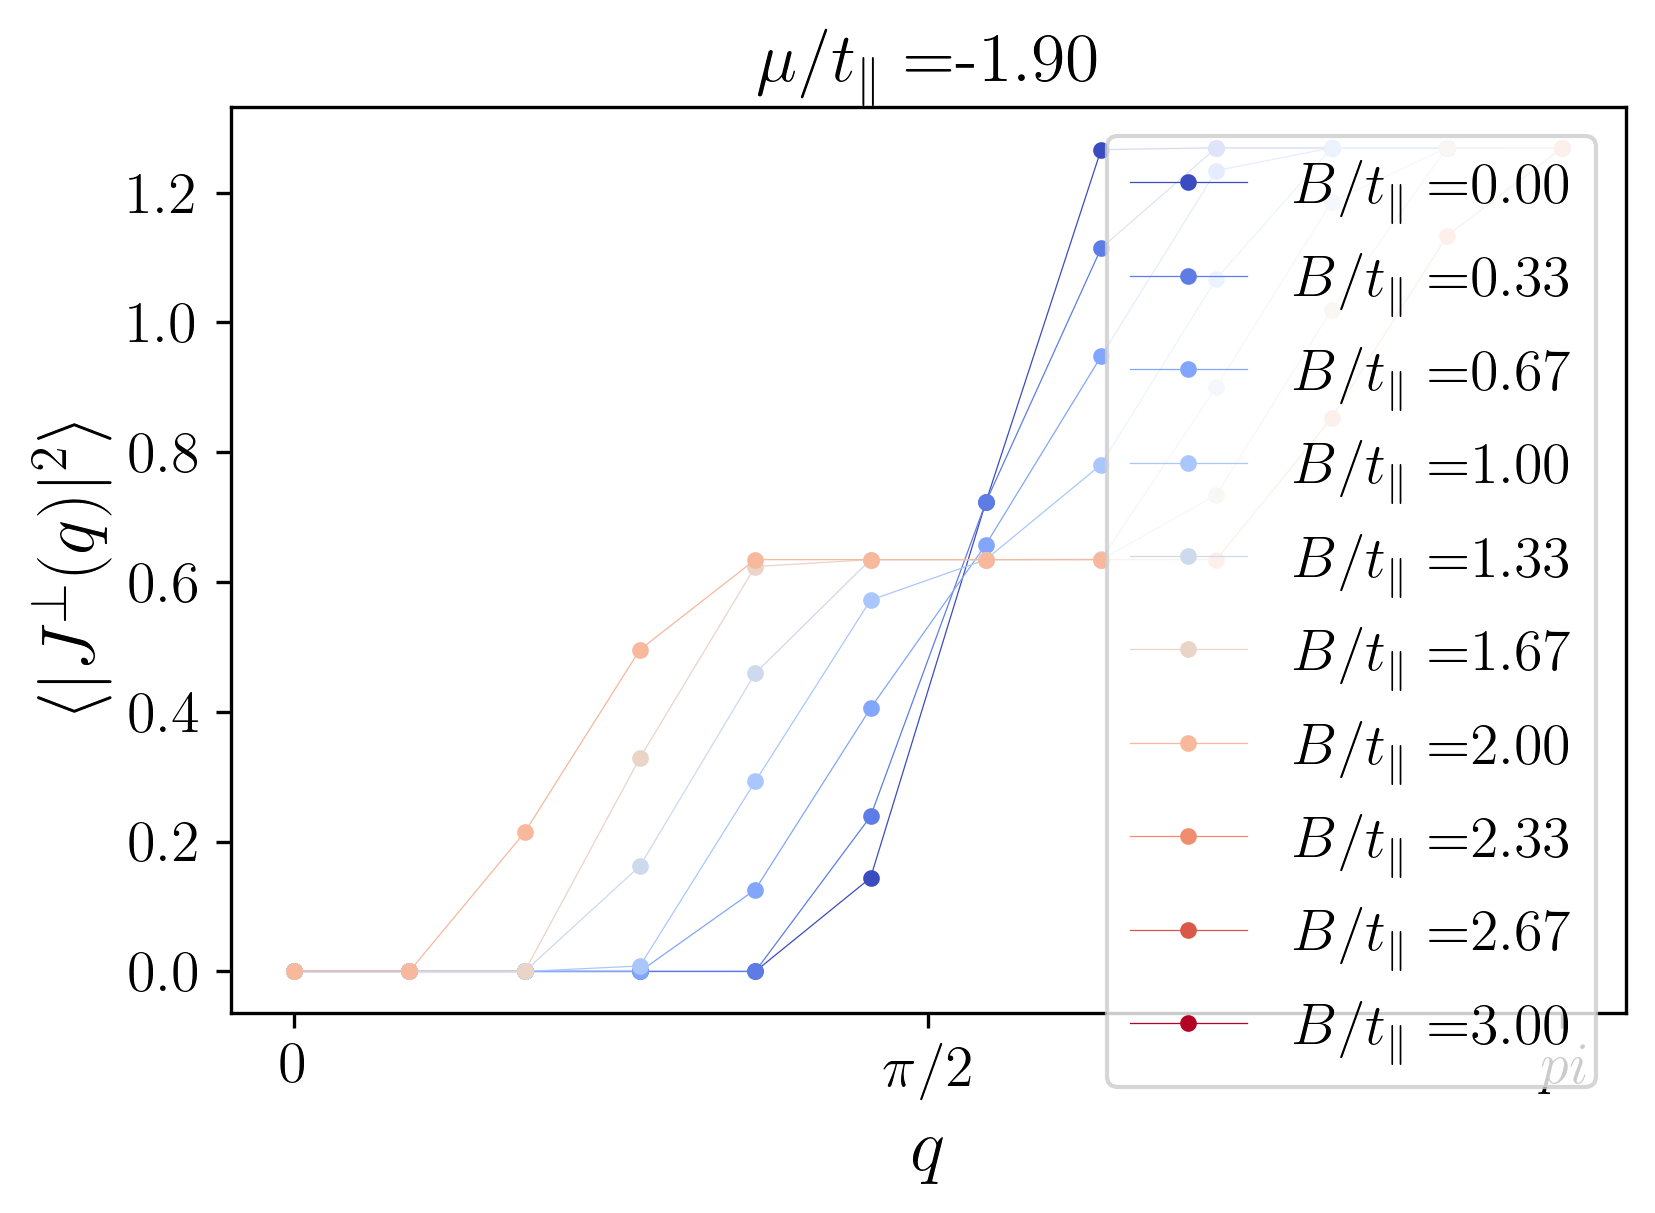

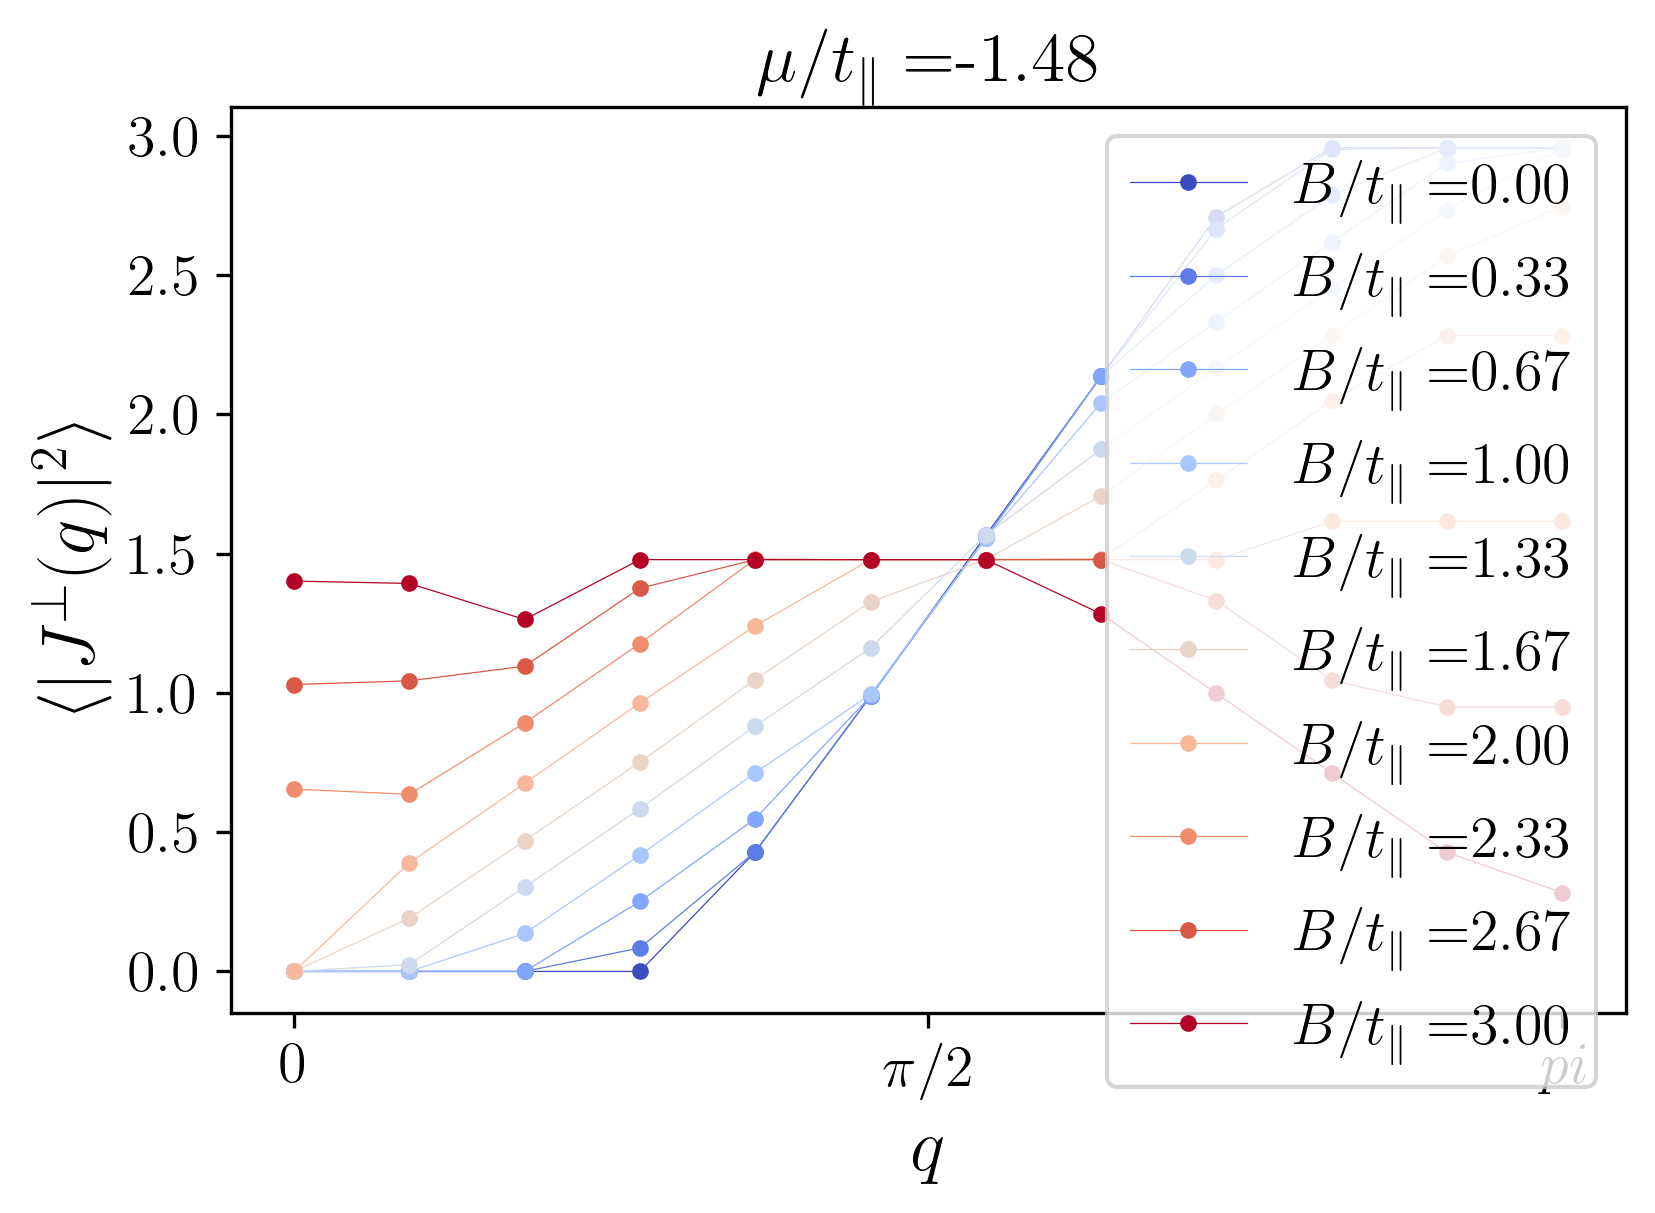

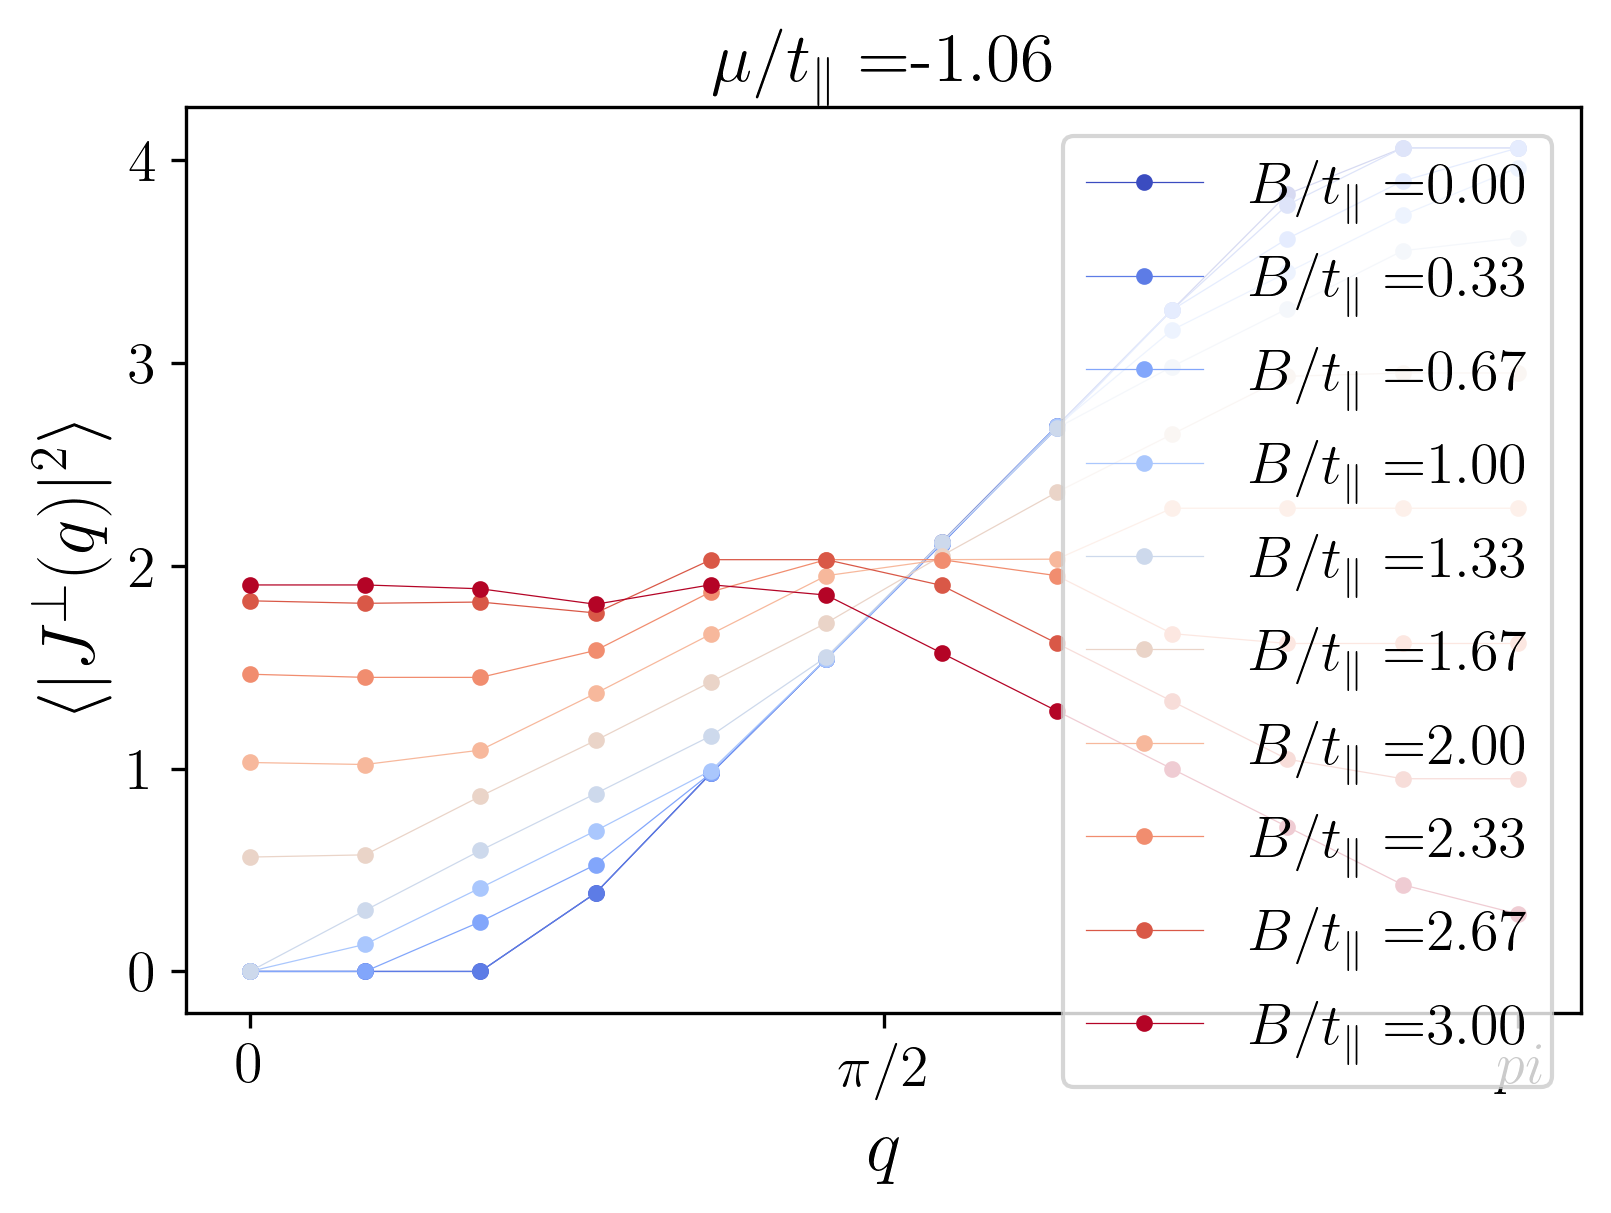

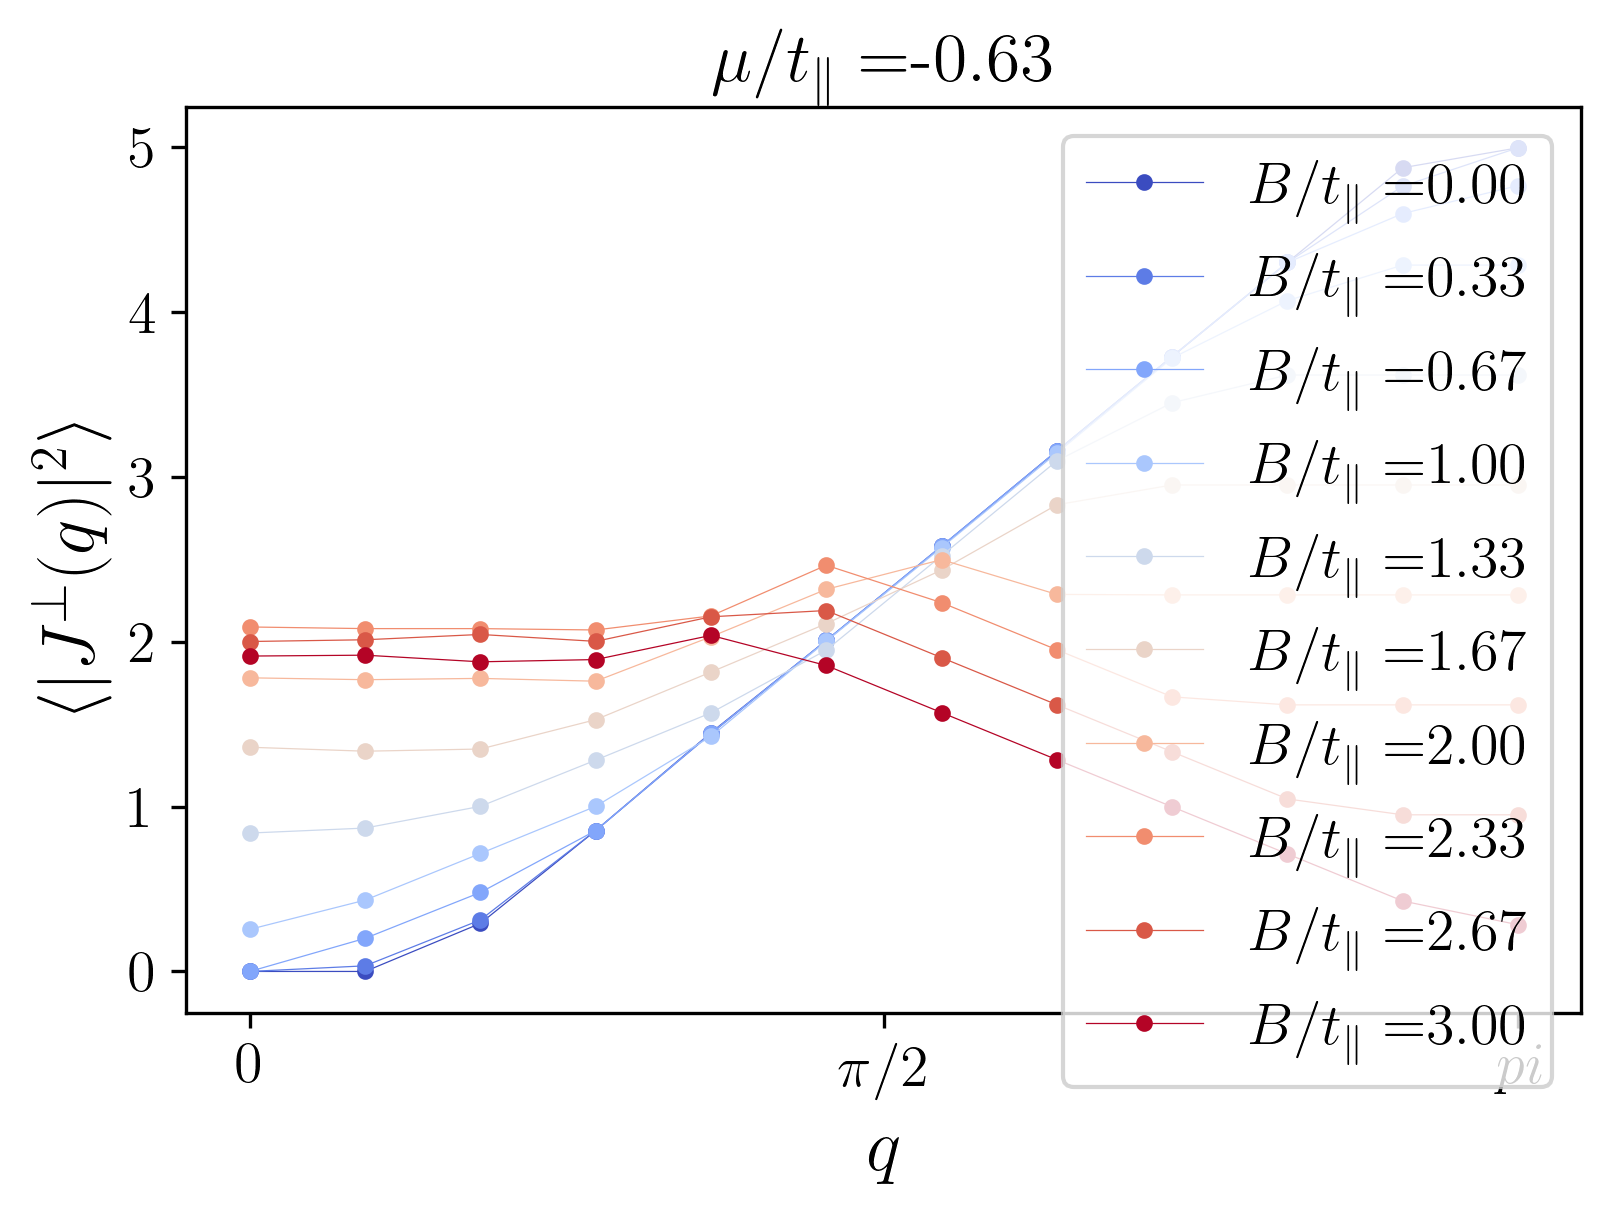

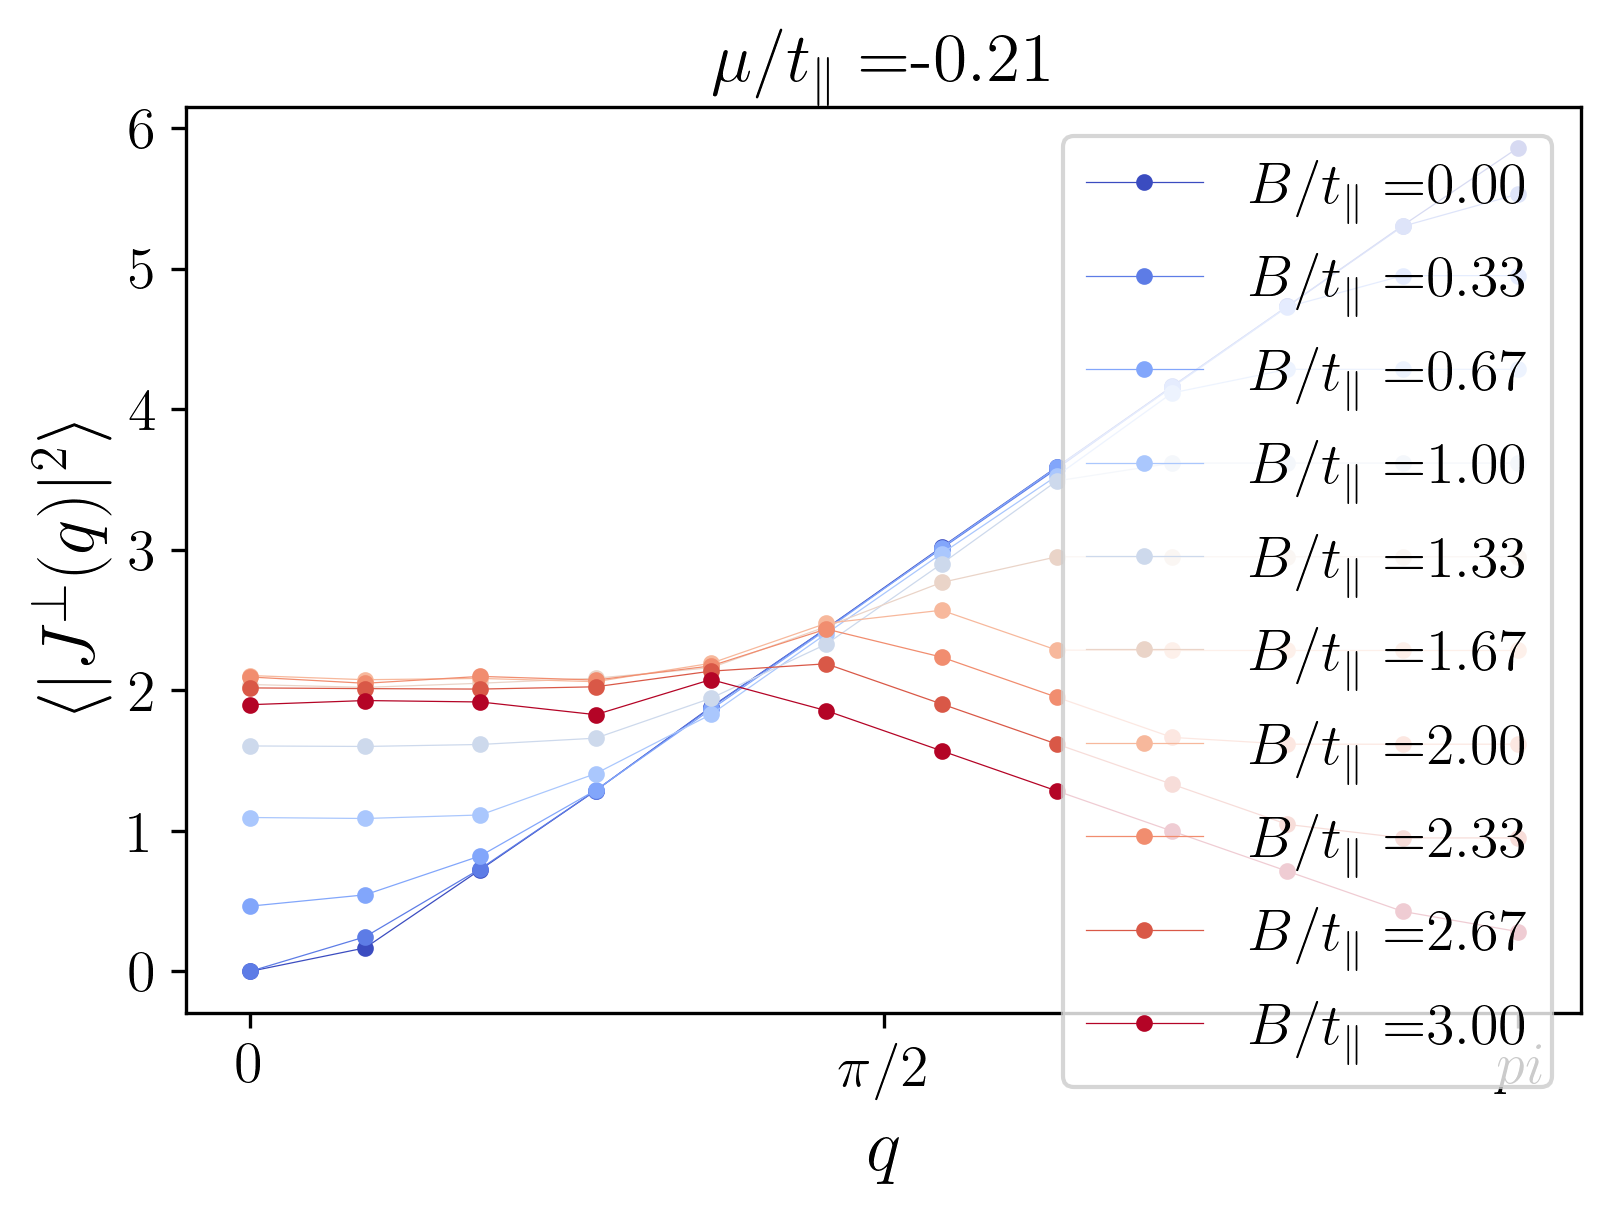

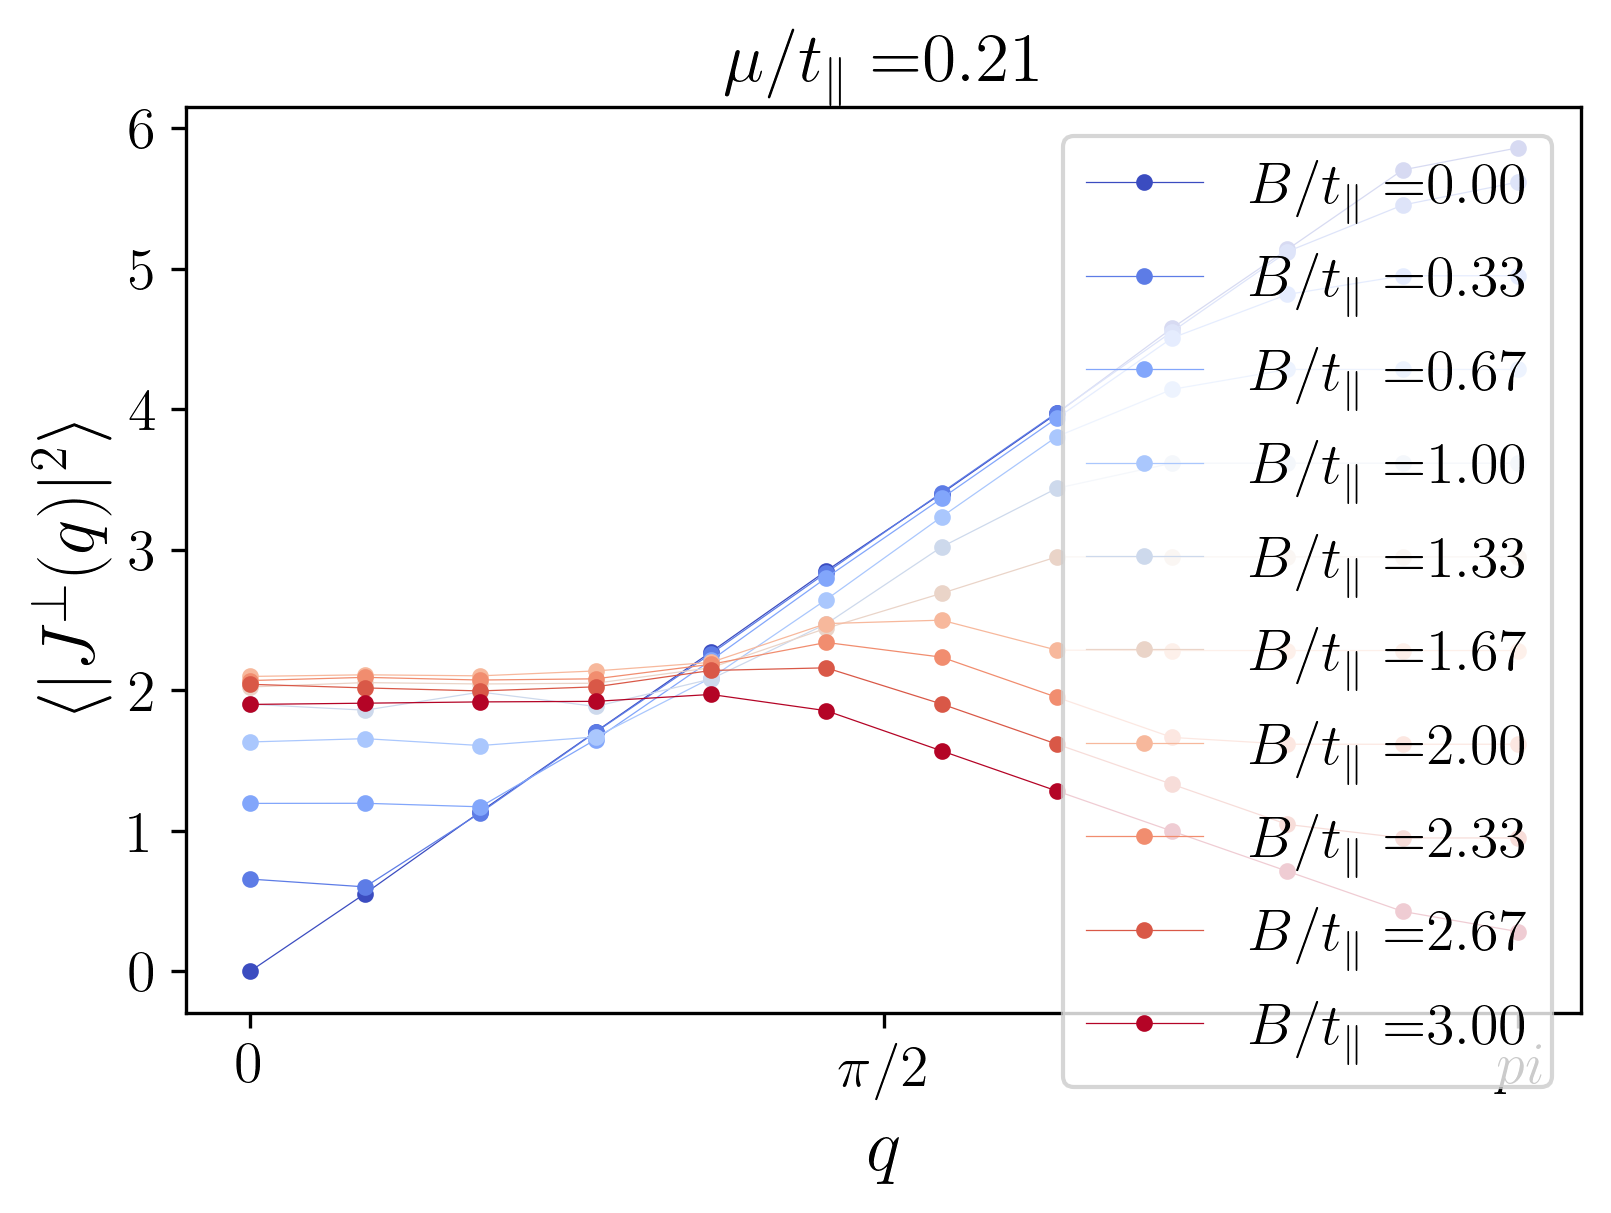

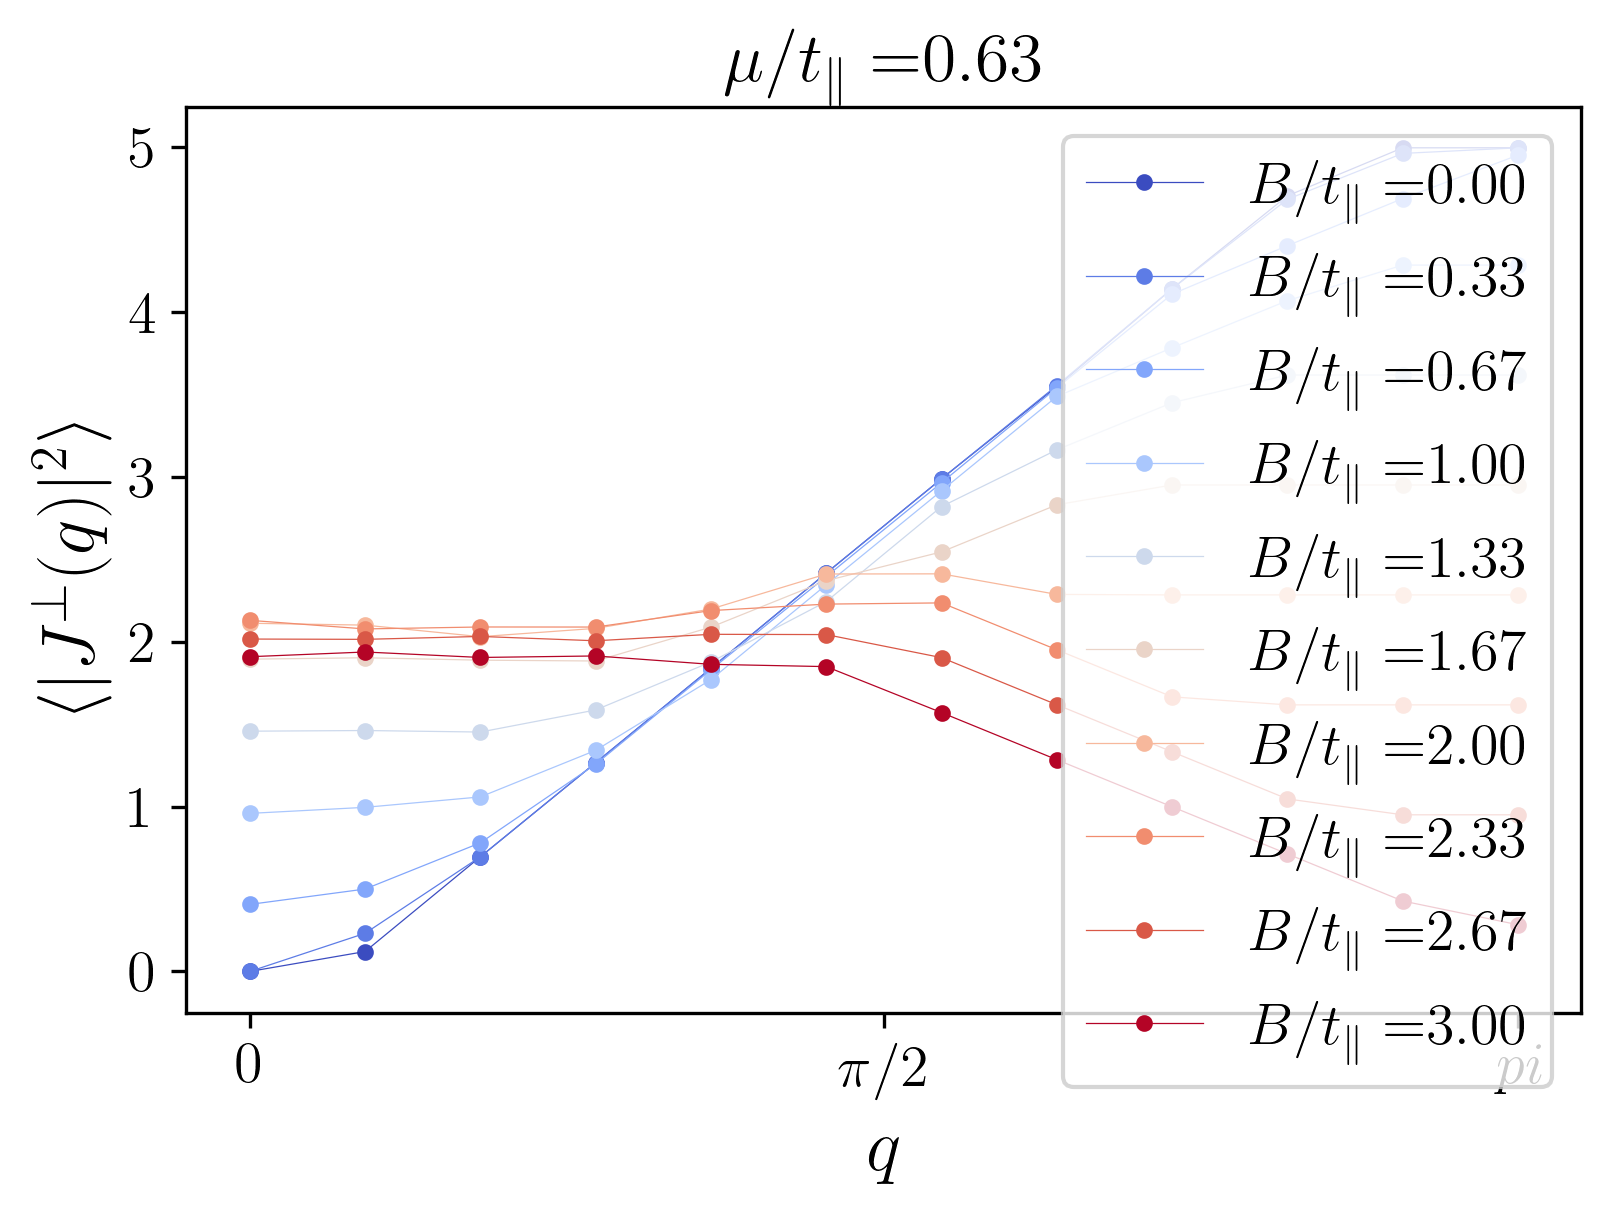

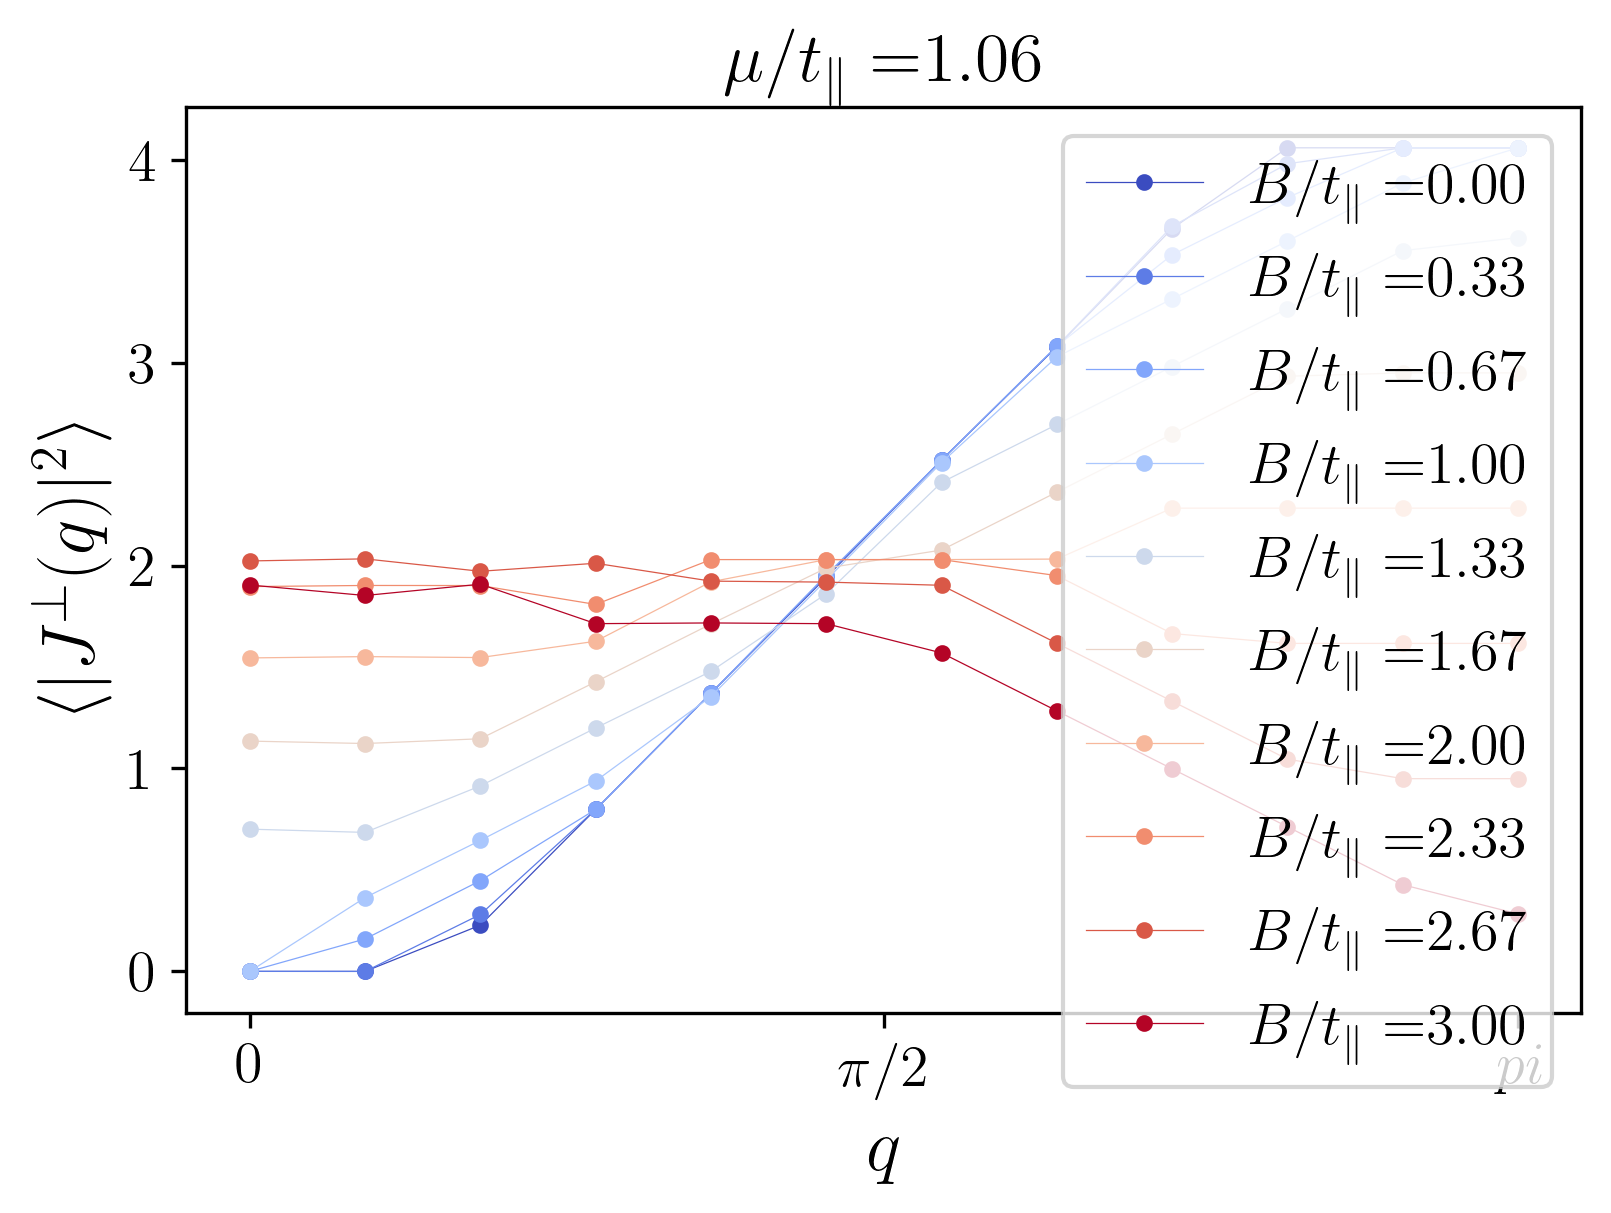

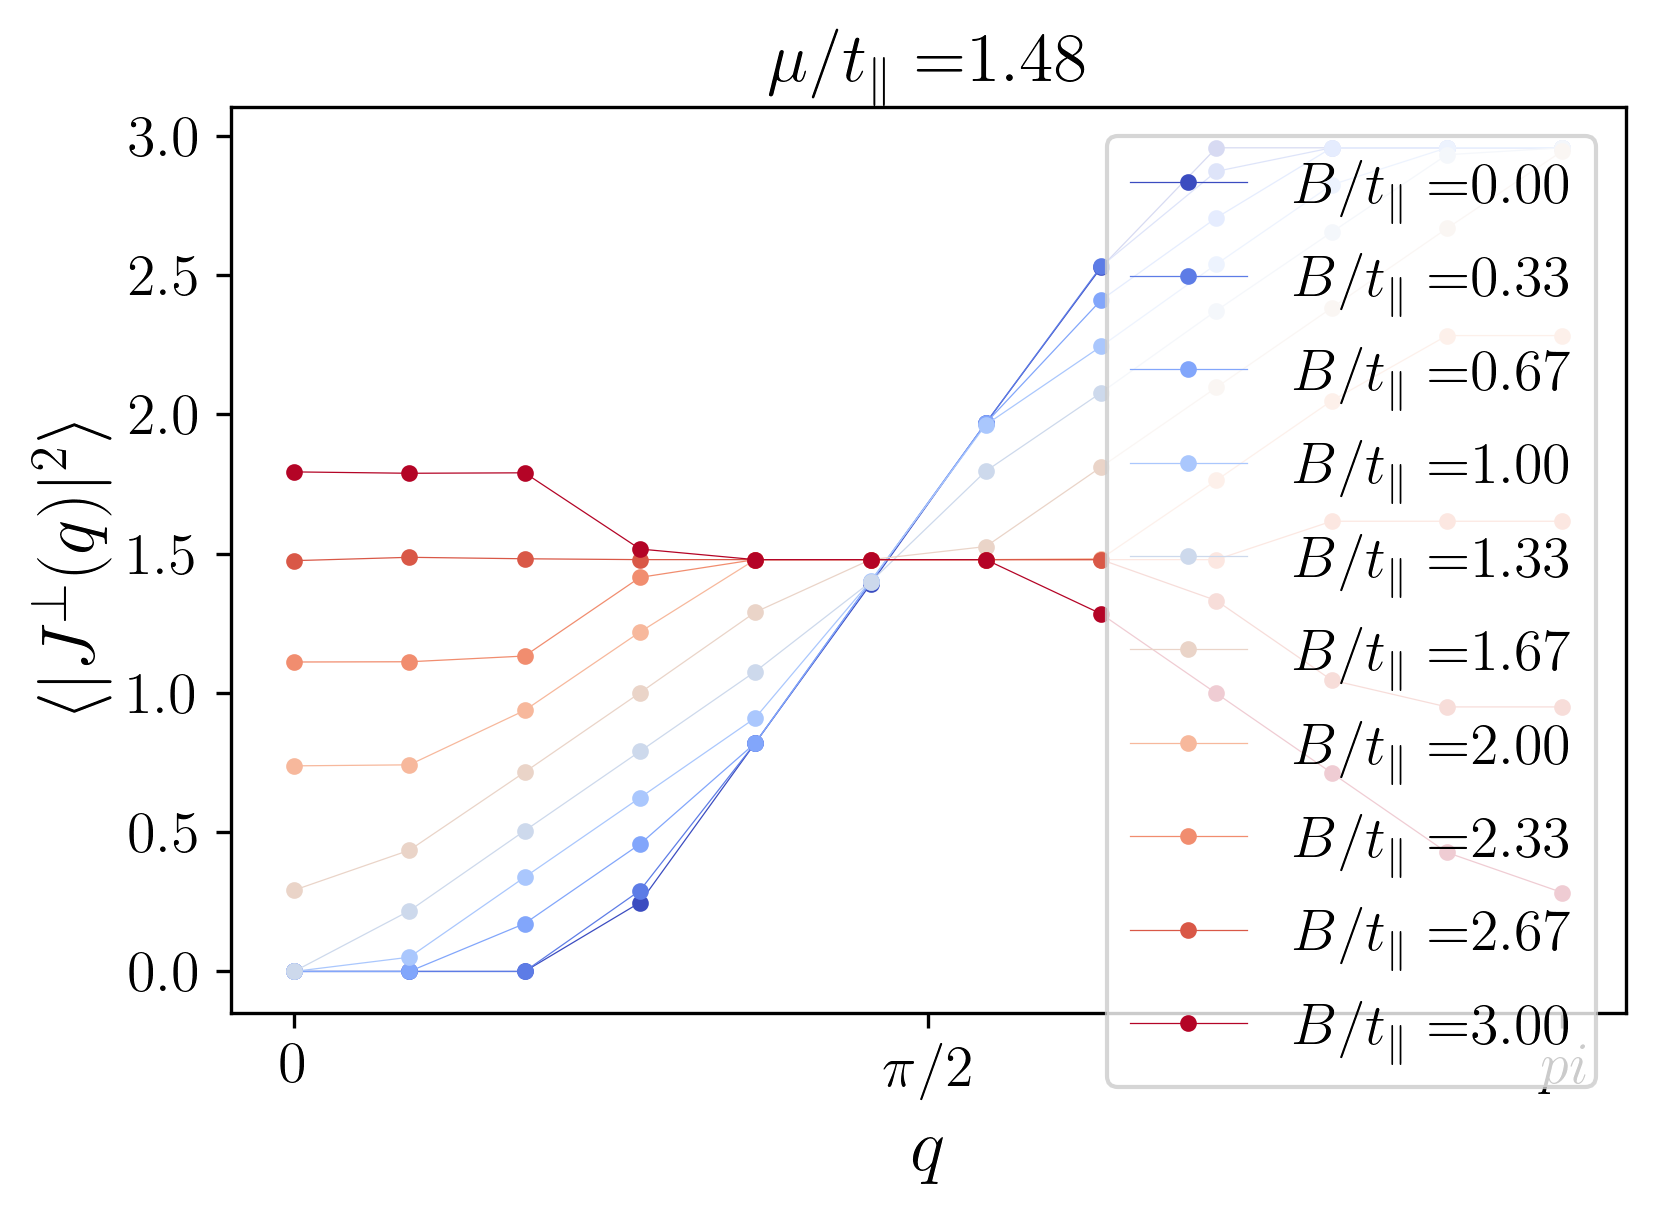

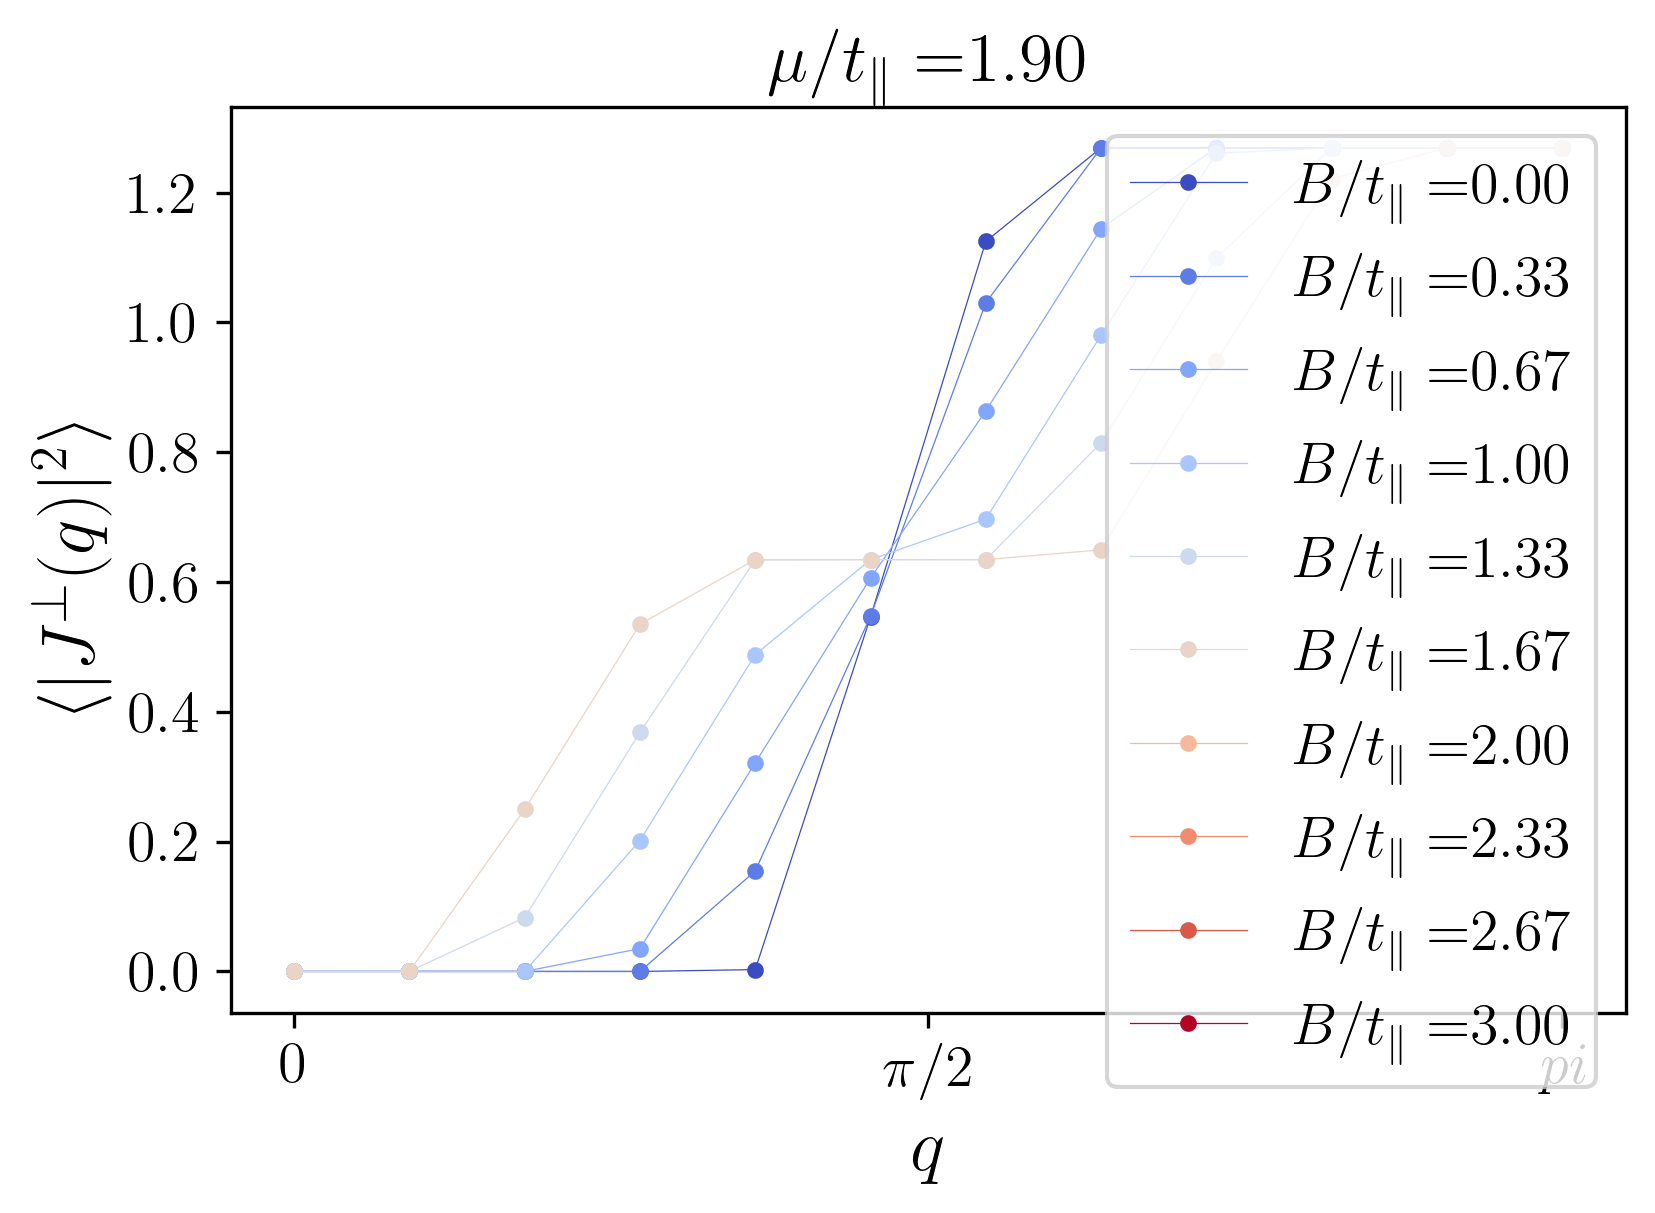

In [76]:
cs = cm.coolwarm(np.linspace(0.,1.,numBs))

for i in range(nummus):
    for j in range(numBs):
        plt.plot(qs,np.real(Piqs[i,j,:]),c=cs[j],label=r'$B/t_\parallel = $'+"{b:0.2f}".format(b=Bs[j]))
    
    plt.title(r'$\mu/t_\parallel = $'+"{m:0.2f}".format(m=mus[i]))
    plt.xlabel(r'$q$')
    plt.xticks([0.,np.pi/2, np.pi],[r'$0$',r'$\pi/2$',r'$pi$'])
    plt.ylabel(r'$\langle |J^\perp(q)|^2 \rangle$')
    plt.legend()
    plt.show()